# Query regions for GALEX

- https://astrodatascience.net/introduction-to-sdss/


- need mocpy, astroquery and regions (install with conda)


In [1]:
from astroquery.cds import cds
import astropy.units as u
import mocpy

tbl = cds.find_datasets(meta_data='ID=*galex*', fields=['ID'])
 
print(tbl)

                  ID                 
-------------------------------------
                 CDS/II/335/galex_ais
         CDS/J/A+A/544/A101/hrs-galex
              CDS/J/ApJ/711/928/galex
             CDS/J/ApJS/173/185/galex
     archive.stsci.edu/catalogs/galex
          archive.stsci.edu/sia/galex
irsa.ipac/cosmos/catalog/cosmos-galex
          mast.stsci/siap/galex_atlas
                nasa.heasarc/galexlog
               nasa.heasarc/galextdsc
           nasa.heasarc/skyview/galex
          wfau.roe.ac.uk/galexgr6-dsa


In [2]:
dataset_name = 'CDS/II/335/galex_ais'

In [3]:
moc = cds.find_datasets(meta_data=dataset_name,return_moc=True)

In [4]:
#print(moc.contains_lonlat(0*u.deg, 0*u.deg))
#print(moc.contains_lonlat(10*u.deg, 80*u.deg))
#print(moc.contains_lonlat(0*u.deg, 0*u.deg))
#print(moc.contains_lonlat(10, 80))

In [4]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Angle
#from mocpy import World2ScreenMPL  
from mocpy import  MOC, WCS
 
#fig = plt.figure(111)
#wcs = World2ScreenMPL(fig=fig,
#                      fov=360*u.deg,
#                      center=SkyCoord(180, 0, unit='deg'),
#                      coordsys="icrs",
#                      rotation=Angle(0, u.deg),
#                      projection="MOL" #AIT
#                      ).w
 
#ax = fig.add_subplot(1, 1, 1, projection=wcs)
 
#moc.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="red")
#moc.border(ax=ax, wcs=wcs, alpha=0.5, color="black")
 
#plt.grid(color="black", linestyle="dotted")
#plt.show()

https://github.com/cds-astro/mocpy/blob/master/docs/examples/plot_SDSS_r.py

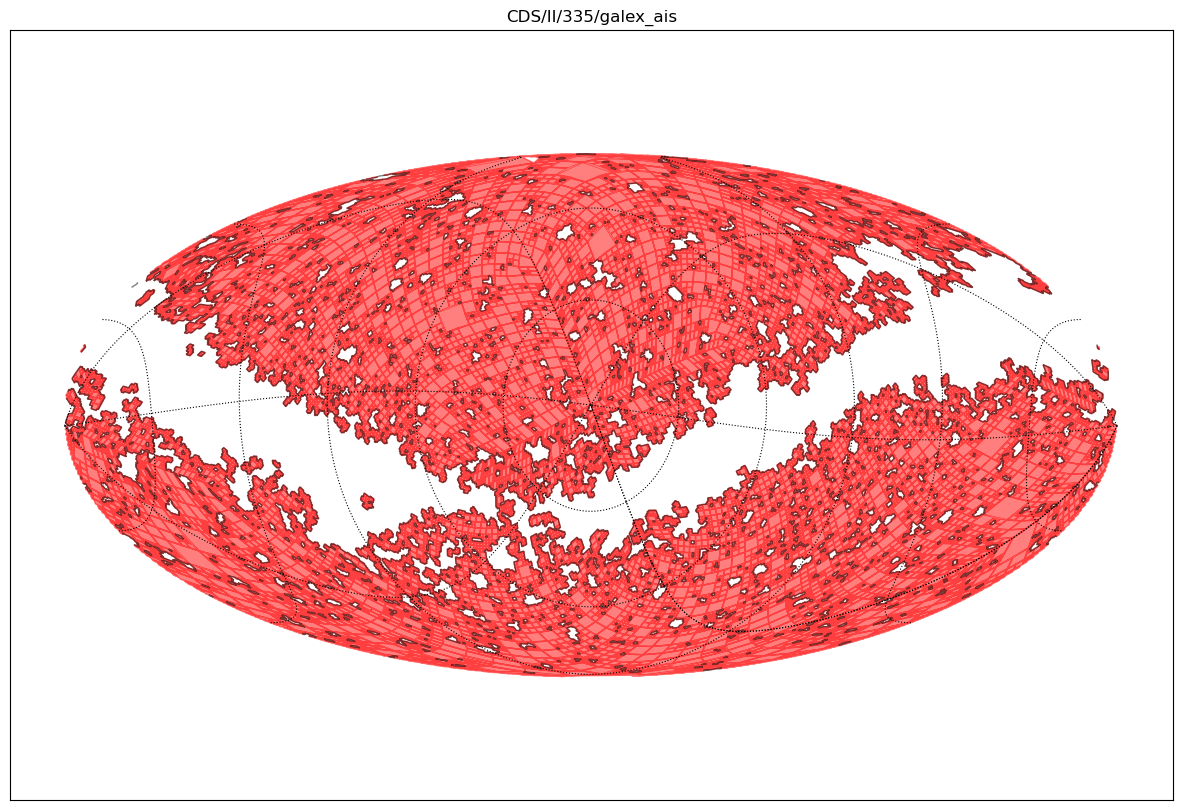

In [5]:
fig = plt.figure(111, figsize=(15, 10))
# Define a astropy WCS easily
#wcs = moc.wcs(fig, coordsys="icrs", rotation=Angle(0, u.degree), projection="AIT")
wcs = moc.wcs(fig, coordsys="icrs", rotation=Angle(0, u.degree), projection="MOL")
ax = fig.add_subplot(1, 1, 1, projection=wcs)
# Call fill with a matplotlib axe and the `~astropy.wcs.WCS` wcs object.
moc.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="red")
moc.border(ax=ax, wcs=wcs, alpha=0.5, color="black")
plt.xlabel("ra")
plt.ylabel("dec")
plt.title(dataset_name)
plt.grid(color="black", linestyle="dotted")
plt.show()